# PyTorch Library (Part 3)

# Machine Learning Summary

In [44]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

Suppose there is data with an independent vector $x_i$ and a dependent vector $y_i$ ($i$ is the position of the value in the dataset).

Examples:

- $x_i$ is the height of the ith person; $y_i$ is the weight (predicting weight with height).
- $x_i$ is an image of a digit; $y_i$ is the actual digit (predicting what the number is on an image).
- $x_i$ is some medical image; $y_i$ corresponds to the pixels of a tumor.

Define a function f that depends on parameters $a$ and makes predictions. This is what neural networks do.

$$\hat y_i = f(x_i ; a)$$

The goal is to make the predictions ($\hat y_i$) as close to the real values $y_i$ as possible by tweaking the parameters like dials to minimize what is called the **loss function** defined as $L(y, \hat y)$. The loss function is calculated as follows:

$$L(y, \hat y) = \sum_{i} (y-\hat y)^2$$

# Last Video Notes

Given 4 data points ($x_i$, $y_i$) and wanted to find a function f such that $f(x_i) = y_i$. Since each $x_i$ was a vector of length 2, we chose the function

$$f(x) = A_2 A_1 x$$

Where $A_1$ is a $8 \times 2$ matrix and $A_2$ is a $1 \times 8$ matrix. That means there were 16 + 8 parameters. This function did not do very well at making $f(x_i) = y_i$ due to there only being 24 parameters which isn't much.

In [45]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

class MyFirstNetwork(nn.Module): # nn.Module is a super class which our class will inherit its attributes and methods from.
    def __init__(self):
        super().__init__() # This is the line that makes our class inherit from the nn.Module class.
        self.Mat1 = nn.Linear(2, 8, bias = False)
        self.Mat2 = nn.Linear(8, 1, bias = False)
    def forward(self, x): # Define a forward method for forward propagation.
        x = self.Mat1(x) # Applies the linear transformation of Mat1.
        x = self.Mat2(x) # Applies the linear transformation of Mat2 after Mat1.
        return x.squeeze()

f = MyFirstNetwork()
opt = SGD(f.parameters(), lr = 0.001)
L = nn.MSELoss()

losses = []

for _ in range(50): # Go through 50 epochs.
    opt.zero_grad() # Resets the gradient to 0 after each epoch so that the loss can decrease.
    loss_value = L(f(x), y) # Calculate the loss from predicted and actual y-values.
    loss_value.backward() # Compute the gradient of the loss function in backpropagation.
    opt.step() # Updates parameters using the gradient computed above.
    losses.append(loss_value.item())

In [46]:
y

tensor([1., 5., 2., 5.])

In [47]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

# This Video Notes

Although there were 24 parameters in the two matrices, there were technically only **two** independent parameters. This is because

$$A_1 A_2 = B$$

where $B$ is a $2 \times 1$ matrix. So, our function really was $Bx$

# How to Have More Advanced Models with the Simplicity of Linear Algebra

**The Crux of Machine Learning**: This lies in **activation functions** which add *slight* non-linearities to a sequence of matrix transformations. Instead of the transformation

**Old Model**: $$f(x) = A_2 A_1 x$$

We use 

**New Model**: $$f_2(x) = A_2 R(A_1 x)$$

where $R$ is an element-wise operator defined by

$$R(x) = \begin{cases} x & x > 0\\ 0 & x \le 0 \end{cases}$$

So, $R$ is the identity function if $x > 0$ but sets values equal to 0 if $x$ is less than zero. This is close to being a linear operator, but it is not.

In [48]:
x = torch.tensor([[1,4,7,-8,3,3,-7],[6,-4,5,-9,4,-3,2]])
x

tensor([[ 1,  4,  7, -8,  3,  3, -7],
        [ 6, -4,  5, -9,  4, -3,  2]])

In [49]:
R = nn.ReLU() # ReLU activation function.
R(x)

tensor([[1, 4, 7, 0, 3, 3, 0],
        [6, 0, 5, 0, 4, 0, 2]])

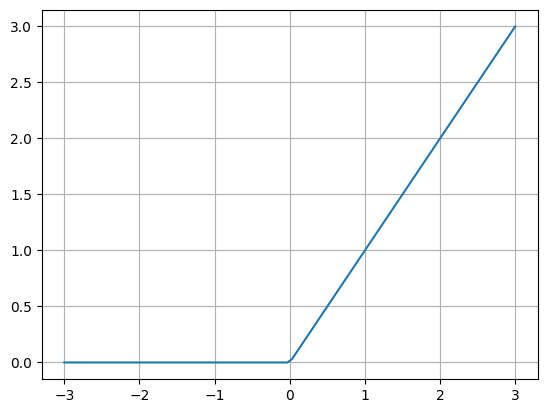

In [50]:
x = torch.linspace(-3, 3, 100)
y = R(x)

plt.plot(x.numpy(), y.numpy())
plt.grid()

How much better does the model learn with this activation function?

In [51]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

class MySecondNetwork(nn.Module): # nn.Module is a super class which our class will inherit its attributes and methods from.
    def __init__(self):
        super().__init__() # This is the line that makes our class inherit from the nn.Module class.
        self.Mat1 = nn.Linear(2, 8, bias = False)
        self.Mat2 = nn.Linear(8, 1, bias = False)
        self.R = nn.ReLU()
    def forward(self, x): # Define a forward method for forward propagation.
        x = self.R(self.Mat1(x)) # Applies the linear transformation of Mat1.
        x = self.Mat2(x) # Applies the linear transformation of Mat2 after Mat1.
        return x.squeeze()

**Define a function** to train model as this will be done many times. 

In [52]:
def training(x, y, f, n_epochs = 50):
    opt = SGD(f.parameters(), lr = 0.001)
    L = nn.MSELoss()

    # training
    losses = []
    for _ in range(n_epochs): # Go through 50 epochs.
        opt.zero_grad() # Resets the gradient to 0 after each epoch so that the loss can decrease.
        loss_value = L(f(x), y) # Calculate the loss from predicted and actual y-values.
        loss_value.backward() # Compute the gradient of the loss function in backpropagation.
        opt.step() # Updates parameters using the gradient computed above.
        losses.append(loss_value.item())
    return f, losses

In [53]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()
f2 = MySecondNetwork()

# Training models
f2, losses2 = training(x, y, f2, n_epochs = 1000)

Let's look at the predictions.

In [54]:
y

tensor([1., 5., 2., 5.])

In [55]:
f(x)

tensor([3.0456, 2.6788, 1.6338, 5.1018], grad_fn=<SqueezeBackward0>)

In [56]:
f2(x)

tensor([2.8451, 2.5382, 2.0960, 5.1596], grad_fn=<SqueezeBackward0>)

Slightly better. Due to the slight non-linearity from the activation function, the matrices can be much larger. Let's make our matrices $80 \times 2$ and $1 \times 80$. This **only** works due to our non-linear function $R(x)$.

- Without $R(x)$, we would just have $A_1 A_2 = B$ and so $f(x) = Bx$ where $B$ is still a $1 \times 2$ matrix even though $A_2$ & $A_1$ are larger matrices. $R(x)$ makes all 240 parameters independent from each other to an extent.

Old Model: $f_2(x)$
= $A_2 R(A_1x)$ where $A_2$ is $1 \times 8$ and $A_1$ is $8 \times 2$

New Model: $f_3(x)$
= $A_2 R(A_1x)$ where $A_2$ is $1 \times 80$ and $A_1$ is $80 \times 2$


In [57]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

class MyThirdNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Mat1 = nn.Linear(2, 80, bias = False)
        self.Mat2 = nn.Linear(80, 1, bias = False)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Mat1(x))
        x = self.Mat2(x)
        return x.squeeze()
    
# Training the third model
f3 = MyThirdNetwork()
f3, losses3 = training(x, y, f3, n_epochs = 1000)

In [58]:
y

tensor([1., 5., 2., 5.])

In [59]:
f2(x)

tensor([2.8451, 2.5382, 2.0960, 5.1596], grad_fn=<SqueezeBackward0>)

In [60]:
f3(x)

tensor([2.7927, 2.5214, 1.9654, 5.2417], grad_fn=<SqueezeBackward0>)

Closer but still not exact. Other parameters can be introduced to make better models.

$$f(x) = A_2 R(A_1 x + b_1) + b_2$$

where $b_1$ and $b_2$ are vectors added to each linear transformation.

Old Model: $f_3(x) = A_2 R(A_1x)$ where $A_2$ is $1 \times 80$ and $A_1$ is $80 \times 2$

New Model: $f_4(x) = A_2 R(A_1x + b_1) + b_2$ where $A_2$ is $1 \times 80$ and $A_1$ is $80 \times 2$

In [61]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

class MyFourthNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Mat1 = nn.Linear(2, 80)
        self.Mat2 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Mat1(x))
        x = self.Mat2(x)
        return x.squeeze()
    
# Training the fourth model
f4 = MyFourthNetwork()
f4, losses4 = training(x, y, f4, n_epochs = 1000)

In [62]:
f4(x)

tensor([2.7003, 2.8283, 2.1288, 5.0823], grad_fn=<SqueezeBackward0>)

Better, yet so far. Adding in another matrix might help.

Old Model: $f_4(x) = A_2 R(A_1x + b_1) + b_2$ where $A_2$ is $1 \times 80$ and $A_1$ is $80 \times 2$

New Model: $f_5(x) = A_3 R(A_2 R(A_1x + b_1) + b_2)$ where $A_3$ is $1 \times 80$ $A_2$ is $80 \times 80$ and $A_1$ is $80 \times 2$


In [64]:
x = torch.tensor([[6,2], [5,2], [1,3], [7,6]]).float()
y = torch.tensor([1, 5, 2, 5]).float()

class MyFifthNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.Mat1 = nn.Linear(2, 80)
        self.Mat2 = nn.Linear(80, 80)
        self.Mat3 = nn.Linear(80, 1)
        self.R = nn.ReLU()
    def forward(self, x):
        x = self.R(self.Mat1(x))
        x = self.R(self.Mat2(x))
        x = self.Mat3(x)
        return x.squeeze()
    
# Training the fifth model
f5 = MyFifthNetwork()
f5, losses5 = training(x, y, f5, n_epochs = 1000)

In [65]:
f5(x)

tensor([2.6101, 2.9425, 2.1192, 5.0993], grad_fn=<SqueezeBackward0>)

In [66]:
sum(losses2), sum(losses3), sum(losses4), sum(losses5)

(2712.5032787323, 2409.366766691208, 2138.61077606678, 2070.6738793849945)

With more epochs:

In [ ]:
f5, losses5 = training(x, y, f5, n_epochs = 10000)
f5(x) # Output tensor matches the actual tensor y.

tensor([1.0000, 5.0000, 2.0000, 5.0000], grad_fn=<SqueezeBackward0>)

In [69]:
sum(losses5)

1381.9488226632554

To summarize, we improve the neural network model by adding non-linearity with activation functions which in turn allow us to have larger matrices for more accuracy. Biases were also introduced.

# The "Sequential" Network

A general "sequential" neural network can be expressed as:

$$f(x) = \underset{i=1}{\overset{n}{\Huge{\kappa}}} R_i(A_ix+b_i)$$

where $\underset{i=1}{\overset{n}{\Huge{\kappa}}} f_i(x) = f_n \circ f_{n-1}... \circ f_1(x)$ and the $A_i$ are matrices $b_i$ are bias vectors. Composite functions are used here. Typically, the $R_i$ are the same for all vectors (typically ReLU) **except** for the last layer where it just the identity function.

- **Note**: In convolutional neural networks (CNNs) or other architectures, the $A_i$ 's become sparse matrices, meaning that most of the parameters are equal to zero.